# Color in choropleth maps

based on type of variable:
 - sequential
 - diverging
 - qualitative

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
mx = gpd.read_file("../data/mexico/mexicojoin.shp")

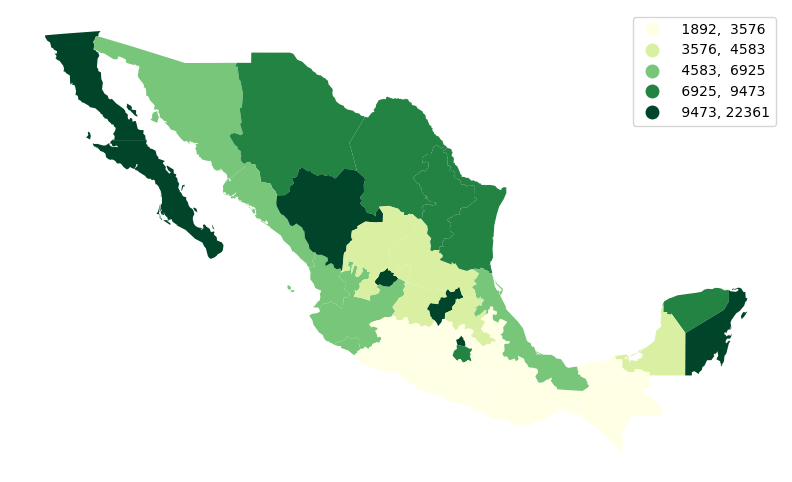

In [10]:
f, ax = plt.subplots(1, figsize=(10,6))
mx.plot(
    ax=ax,
    column='PCGDP1940', 
    scheme='Quantiles', 
    cmap="YlGn", 
    legend=True, 
    legend_kwds={'fmt': '{:.0f}'}
)
ax.set_axis_off();

In [11]:
mx.columns

Index(['POLY_ID', 'AREA', 'CODE', 'NAME', 'PERIMETER', 'ACRES', 'HECTARES',
       'PCGDP1940', 'PCGDP1950', 'PCGDP1960', 'PCGDP1970', 'PCGDP1980',
       'PCGDP1990', 'PCGDP2000', 'HANSON03', 'HANSON98', 'ESQUIVEL99', 'INEGI',
       'INEGI2', 'MAXP', 'GR4000', 'GR5000', 'GR6000', 'GR7000', 'GR8000',
       'GR9000', 'LPCGDP40', 'LPCGDP50', 'LPCGDP60', 'LPCGDP70', 'LPCGDP80',
       'LPCGDP90', 'LPCGDP00', 'TEST', 'geometry'],
      dtype='object')

# Sequential

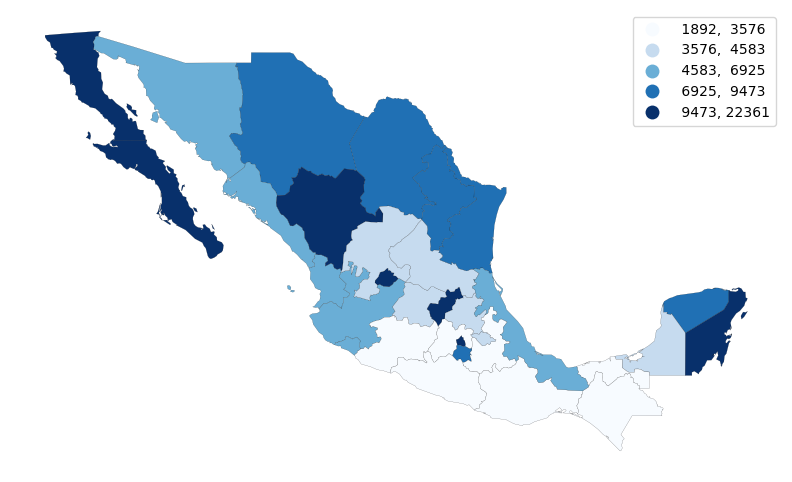

In [12]:
f, ax = plt.subplots(1, figsize=(10,6))
mx.plot(
    ax=ax,
    column='PCGDP1940', 
    scheme='Quantiles', 
    cmap='Blues', 
    ec='k', 
    lw=0.1, 
    legend=True, 
    legend_kwds = dict(fmt="{:.0f}")
)
ax.set_axis_off();

# Diverging

Emphasize the middle as well as the extremes, or divergence from a center

In [13]:
rnk = mx[['NAME', 'PCGDP1940', "PCGDP2000"]].rank(ascending=False)

In [16]:
rnk['change'] = rnk.PCGDP1940 - rnk.PCGDP2000
rnk['class'] = pd.cut(rnk['change'], [-np.inf, -5, 0, 5, 20])

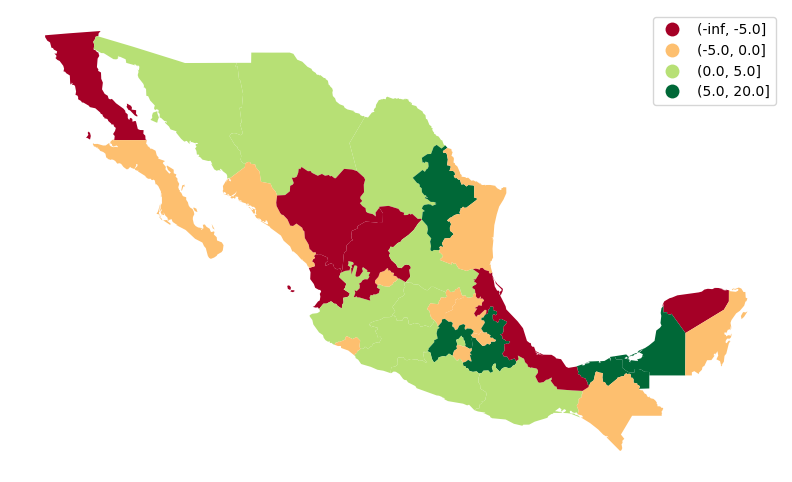

In [19]:
f, ax = plt.subplots(1, figsize=(10,6))
mx[['geometry']].join(rnk).plot("class", legend=True, cmap='RdYlGn', ax=ax)
ax.set_axis_off();

# Qualitative

Avoid palettes which give an appearance of continuity

>HANSON is a regional categorization

In [22]:
mx.HANSON98.head()

0    1.0
1    2.0
2    2.0
3    3.0
4    2.0
Name: HANSON98, dtype: float64

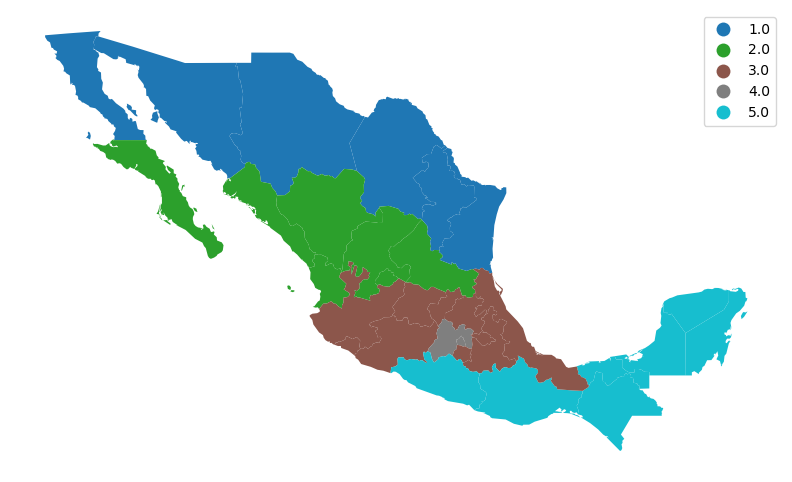

In [23]:
f, ax = plt.subplots(1, figsize=(10,6))
mx.plot('HANSON98', categorical=True, legend=True, ax=ax)
ax.set_axis_off();